In [16]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [18]:
df = df.dropna()

In [19]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [20]:
df.index.freq = 'MS'

In [21]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [22]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [25]:
span = 12
alpha = 2/(span+1)

In [26]:
df['EMWA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [27]:
df.head()

,Thousands of Passengers,EMWA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [28]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [30]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [34]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [38]:
df.head()

,Thousands of Passengers,EMWA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


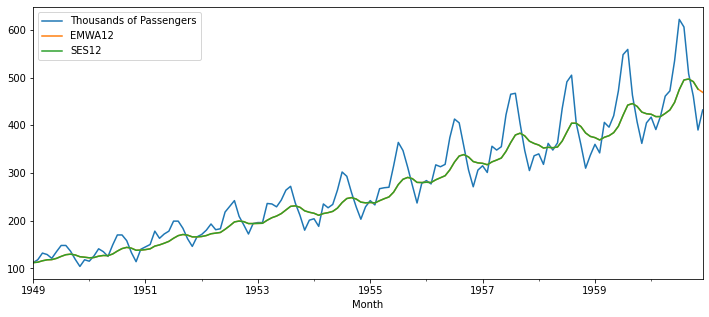

In [40]:
df.plot(figsize=(12, 5))

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [41]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [42]:
df.head()

,Thousands of Passengers,EMWA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336233
1949-02-01,118,112.923077,112.923077,120.336233
1949-03-01,132,115.857988,115.857988,134.336233
1949-04-01,129,117.879836,117.879836,131.336233
1949-05-01,121,118.359861,118.359861,123.336233


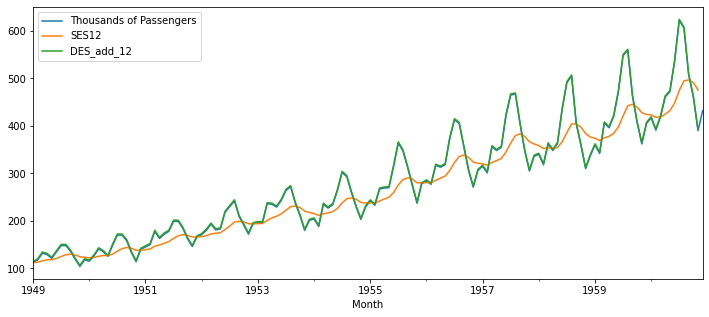

In [45]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot(figsize=(12, 5))

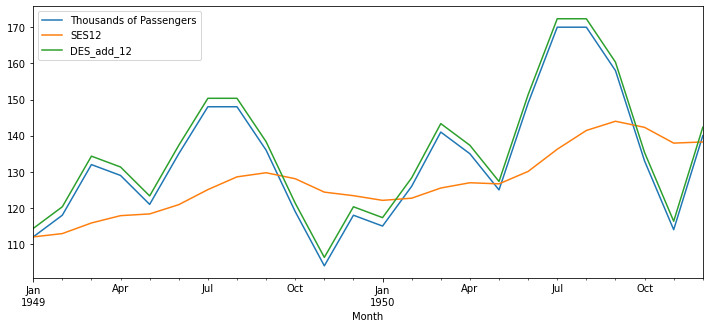

In [46]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12, 5))

In [47]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

In [48]:
df.head()

,Thousands of Passengers,EMWA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247
1949-02-01,118,112.923077,112.923077,120.336233,118.051885
1949-03-01,132,115.857988,115.857988,134.336233,132.058041
1949-04-01,129,117.879836,117.879836,131.336233,129.056722
1949-05-01,121,118.359861,118.359861,123.336233,121.053204


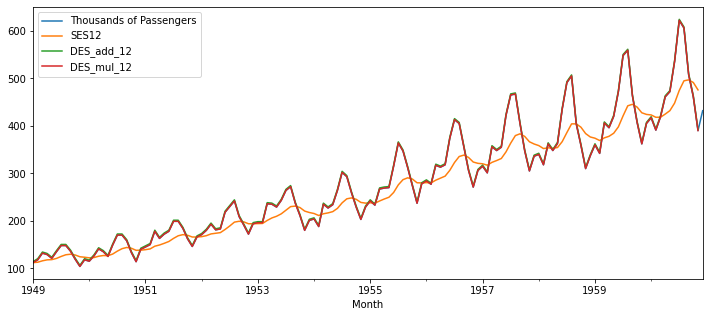

In [50]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].plot(figsize=(12, 5))

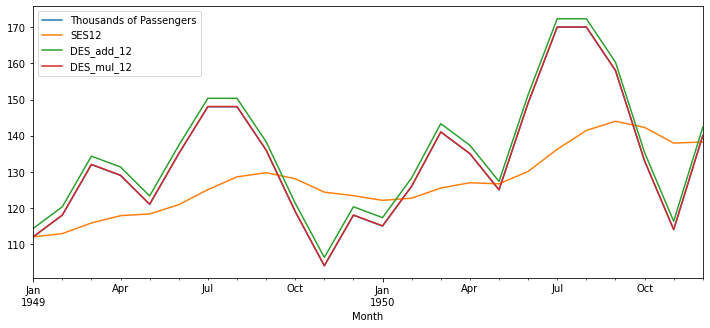

In [53]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12, 5))

In [55]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

In [56]:
df.head()

,Thousands of Passengers,EMWA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247,111.583236
1949-02-01,118,112.923077,112.923077,120.336233,118.051885,118.839294
1949-03-01,132,115.857988,115.857988,134.336233,132.058041,133.327416
1949-04-01,129,117.879836,117.879836,131.336233,129.056722,127.915388
1949-05-01,121,118.359861,118.359861,123.336233,121.053204,120.978320


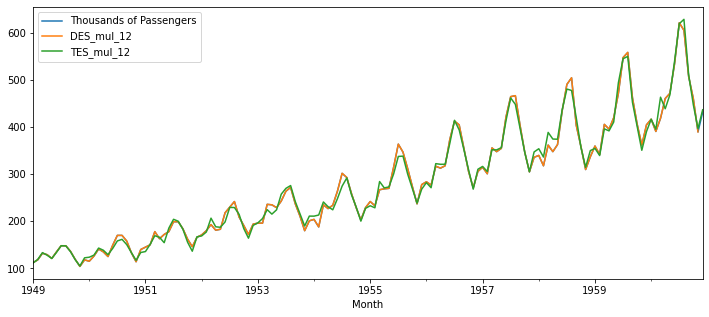

In [57]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].plot(figsize=(12, 5))

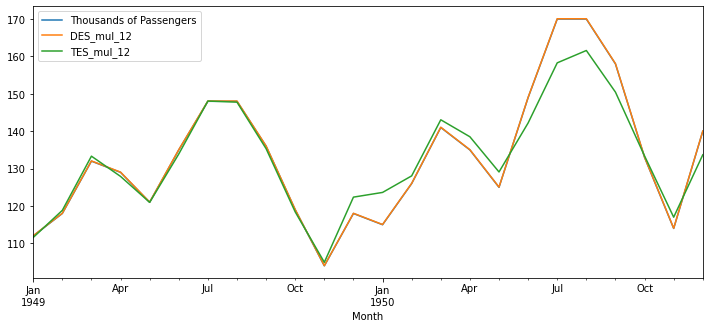

In [58]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12, 5))